# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [191]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [192]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [193]:
#create folder structure
data = os.path.join(save_path, 'data')
os.mkdir(data)

figures = os.path.join(save_path, 'figures')
os.mkdir(figures)

models = os.path.join(save_path, 'models')
os.mkdir(models)

FileExistsError: [Errno 17] File exists: '/Users/joeboardman/Documents/Springboard/Capstone 2/data'

In [239]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [240]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [241]:
#merge batting and position csvs to avoid duplicate rows
df = pd.merge(df, df_position, on=['player_id', 'year'])
df

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,0,0,22,0,3,0,0,0,0,0.0
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,0,0,2,0,0,0,29,0,29,0.0
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27,0,0,0,0,0,0,0,0,0.0
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,5,1,2,20,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116159,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,0,0,34,0,0,27,0,3,29,4.0
116160,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,0,0,35,4,0,18,0,2,20,2.0
116161,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,0,0,34,0,0,27,0,3,29,4.0
116162,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,112,0,0,0,0,0,0,0,0,0.0


In [242]:
#combine records where a player played for multiple teams into one record
#df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df = df.groupby(['player_id', 'year']).mean().reset_index()
print(df.head())
print(df.info())

   player_id  year  stint     g   ab    r    h  double  triple   hr  ...  g_c  \
0  aardsda01  2004    1.0  11.0  0.0  0.0  0.0     0.0     0.0  0.0  ...  0.0   
1  aardsda01  2006    1.0  45.0  2.0  0.0  0.0     0.0     0.0  0.0  ...  0.0   
2  aardsda01  2007    1.0  25.0  0.0  0.0  0.0     0.0     0.0  0.0  ...  0.0   
3  aardsda01  2008    1.0  47.0  1.0  0.0  0.0     0.0     0.0  0.0  ...  0.0   
4  aardsda01  2009    1.0  73.0  0.0  0.0  0.0     0.0     0.0  0.0  ...  0.0   

   g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  g_dh  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93882 entries, 0 to 93881
Data columns (total 31 columns):
 #   Column     Non-Null Count  D

In [243]:
#merge dataframe to bring in player details, salaries etc.
#filter out seasons before 1985, at bats < 130, anybody with more than 10 pitching appearances
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 130]
df = df[df['g_p'] < 10]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10287 entries, 15 to 24780
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      10287 non-null  object 
 1   year           10287 non-null  int64  
 2   stint          10287 non-null  float64
 3   g              10287 non-null  float64
 4   ab             10287 non-null  float64
 5   r              10287 non-null  float64
 6   h              10287 non-null  float64
 7   double         10287 non-null  float64
 8   triple         10287 non-null  float64
 9   hr             10287 non-null  float64
 10  rbi            10287 non-null  float64
 11  sb             10287 non-null  float64
 12  cs             10287 non-null  float64
 13  bb             10287 non-null  float64
 14  so             10287 non-null  float64
 15  ibb            10287 non-null  float64
 16  hbp            10287 non-null  float64
 17  sh             10287 non-null  float64
 18  sf   

In [244]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [245]:
#calculate OPS, years of service, same team
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

    player_id  year  stint      g     ab     r      h  double  triple    hr  \
15  abbotje01  1998    1.0   89.0  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000    1.0   80.0  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994    1.0  101.0  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995    1.0  120.0  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996    1.0  109.0  320.0  37.0   81.0    18.0     7.0   8.0   

    ...  final_game  retro_id   bbref_id  team_id  league_id  salary  \
15  ...  2001-09-29  abboj002  abbotje01      CHA         AL  175000   
17  ...  2001-09-29  abboj002  abbotje01      CHA         AL  255000   
29  ...  2001-04-13  abbok002  abbotku01      FLO         NL  109000   
30  ...  2001-04-13  abbok002  abbotku01      FLO         NL  119000   
31  ...  2001-04-13  abbok002  abbotku01      FLO         NL  250000   

    birth_date       obp       slg       ops  
15  1972-08-17  0.304348  0.491803  0.796151 

In [246]:
#calculate season number in a player's career and age
df['year_of_career'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

    player_id  year  stint      g     ab     r      h  double  triple    hr  \
15  abbotje01  1998    1.0   89.0  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000    1.0   80.0  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994    1.0  101.0  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995    1.0  120.0  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996    1.0  109.0  320.0  37.0   81.0    18.0     7.0   8.0   

    ...   bbref_id  team_id  league_id  salary  birth_date       obp  \
15  ...  abbotje01      CHA         AL  175000  1972-08-17  0.304348   
17  ...  abbotje01      CHA         AL  255000  1972-08-17  0.344538   
29  ...  abbotku01      FLO         NL  109000  1969-06-02  0.292350   
30  ...  abbotku01      FLO         NL  119000  1969-06-02  0.321041   
31  ...  abbotku01      FLO         NL  250000  1969-06-02  0.307246   

         slg       ops  year_of_career  age  
15  0.491803  0.796151               1   26  


In [247]:
#Delete unnecessary columns
df = df.drop(df.columns[[2,20,31,32,33,35,36,37,38,39,40,41,42,46,47,48,49,50,51,52,53,54,55,57]], axis=1)

In [248]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, g_c, g_1b, g_2b, g_3b, g_ss, g_lf, g_cf, g_rf, g_of, g_dh, birth_country, name_first, name_last, name_given, salary, obp, slg, ops, year_of_career, age]
Index: []

[0 rows x 39 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10287 entries, 15 to 24780
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       10287 non-null  object 
 1   year            10287 non-null  int64  
 2   g               10287 non-null  float64
 3   ab              10287 non-null  float64
 4   r               10287 non-null  float64
 5   h               10287 non-null  float64
 6   double          10287 non-null  float64
 7   triple          10287 non-null  float64
 8   hr              10287 non-null  float64
 9   rbi             10287 non-null  float64
 10  sb              10287 non-null  float

In [249]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,birth_country,name_first,name_last,name_given,salary,obp,slg,ops,year_of_career,age
21824,tatisfe01,1998,75.0,266.0,34.5,73.5,16.5,2.0,5.5,29.0,...,D.R.,Fernando,Tatis,Fernando,170000,0.329268,0.415414,0.744682,1,23


In [250]:
#Drop Duplicates
df.drop_duplicates(keep='first', inplace=True)

print(df)

       player_id  year      g     ab     r      h  double  triple    hr   rbi  \
15     abbotje01  1998   89.0  244.0  33.0   68.0    14.0     1.0  12.0  41.0   
17     abbotje01  2000   80.0  215.0  31.0   59.0    15.0     1.0   3.0  29.0   
29     abbotku01  1994  101.0  345.0  41.0   86.0    17.0     3.0   9.0  33.0   
30     abbotku01  1995  120.0  420.0  60.0  107.0    18.0     7.0  17.0  60.0   
31     abbotku01  1996  109.0  320.0  37.0   81.0    18.0     7.0   8.0  33.0   
...          ...   ...    ...    ...   ...    ...     ...     ...   ...   ...   
24767  zobribe01  2015   63.0  233.5  38.0   64.5    18.0     1.5   6.5  28.0   
24776  zuninmi01  2014  131.0  438.0  51.0   87.0    20.0     2.0  22.0  60.0   
24777  zuninmi01  2015  112.0  350.0  28.0   61.0    11.0     0.0  11.0  28.0   
24779  zupcibo01  1992  124.0  392.0  46.0  108.0    19.0     1.0   3.0  43.0   
24780  zupcibo01  1993  141.0  286.0  40.0   69.0    24.0     2.0   2.0  26.0   

       ...  birth_country  

In [251]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 1864
year 31
g 182
ab 724
r 199
h 288
double 89
triple 32
hr 93
rbi 213
sb 111
cs 43
bb 198
so 270
ibb 55
hbp 47
sh 38
sf 30
g_idp 53
g_c 166
g_1b 205
g_2b 210
g_3b 213
g_ss 197
g_lf 221
g_cf 210
g_rf 211
g_of 231
g_dh 191
birth_country 24
name_first 628
name_last 1383
name_given 1694
salary 2058
obp 6881
slg 7614
ops 10259
year_of_career 25
age 30


In [252]:
print(df.birth_country.value_counts())

USA            7802
D.R.            860
Venezuela       546
P.R.            506
Cuba            122
CAN              93
Panama           70
Japan            62
Mexico           54
Colombia         36
Jamaica          30
Curacao          28
Germany          16
South Korea      12
Australia        11
Nicaragua        10
V.I.             10
Honduras          5
France            4
Netherlands       3
Brazil            2
Aruba             2
Belize            1
Belgium           1
Name: birth_country, dtype: int64


In [253]:
round(df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
year,10286.0,2000.0,9.0,1985.0,1993.0,2000.0,2008.0,2015.0
g,10286.0,114.0,34.0,34.0,86.0,118.0,144.0,163.0
ab,10286.0,380.0,154.0,130.0,240.0,383.0,518.0,716.0
r,10286.0,53.0,28.0,4.0,29.0,48.0,73.0,152.0
h,10286.0,103.0,48.0,19.0,60.0,100.0,142.0,262.0
double,10286.0,20.0,11.0,0.0,11.0,18.0,27.0,59.0
triple,10286.0,2.0,2.0,0.0,0.0,2.0,3.0,23.0
hr,10286.0,12.0,10.0,0.0,4.0,9.0,17.0,73.0
rbi,10286.0,50.0,29.0,3.0,26.0,45.0,69.0,165.0
sb,10286.0,8.0,11.0,0.0,1.0,4.0,10.0,110.0


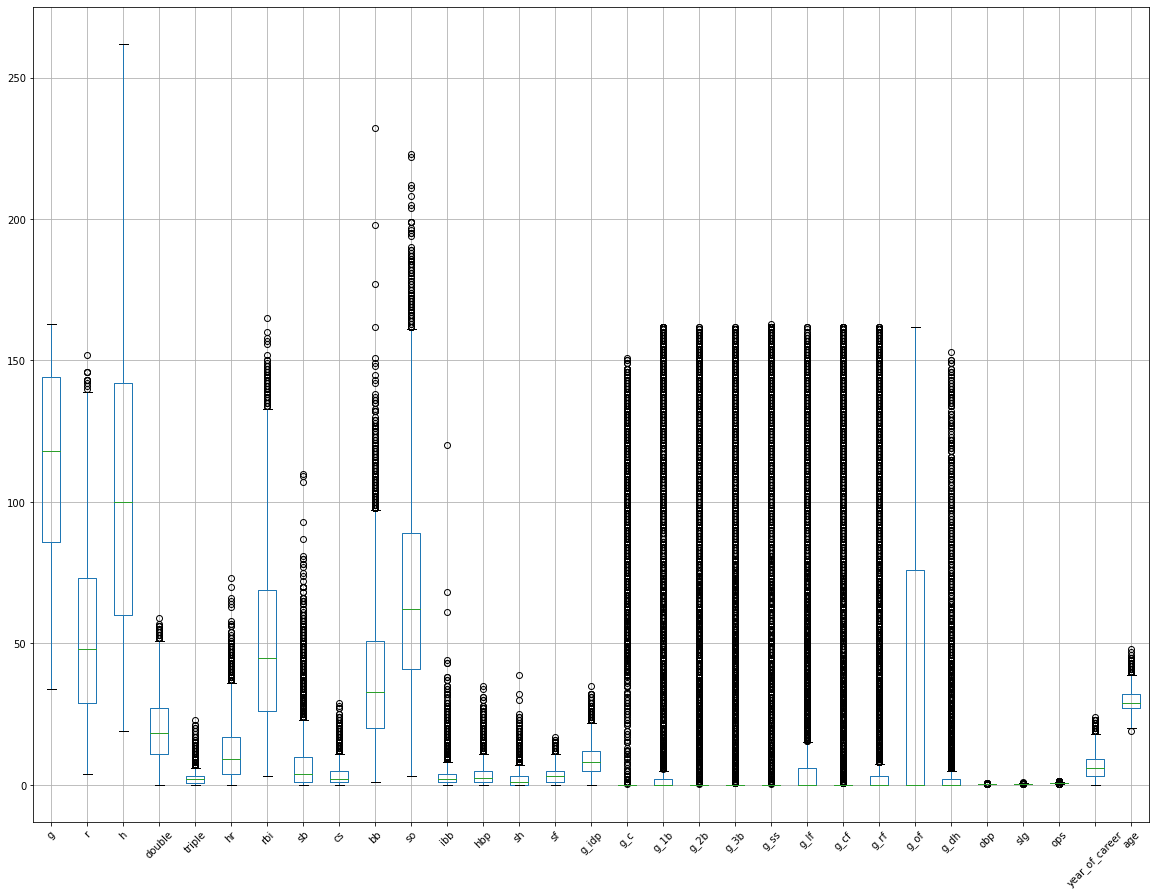

In [254]:
#Check for outliers
df_bp = df.drop(['salary', 'year', 'ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [255]:
# Write your dataframe to csv 
save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)